# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import pickle

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Read Dataset

In [3]:
df = pd.read_csv('datasets/cleaned_dataset.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAGCLxM,HAGSLxHM,HAGCLxHM,HGDLxM,HGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,AASLxM,AASTLxM,AACLxM,AAFLxM,AAYCLxM,AARCLxM,AAGSLxM,AAGCLxM,AAGSLxAM,AAGCLxAM,AGDLxM,AGDLxAM,AAPLxM,AAPLxAM,AWPLxM,AWPLxAM,AWinStreak,HDef,HMid,HAtt,HOvr,ADef,AMid,AAtt,AOvr
0,2012-08-18,arsenal,sunderland,0,0,14,3,4,2,12,8,7,0,0,0,0,0,1.40,4.5,8.5,D,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67
1,2012-09-01,swansea,sunderland,2,2,14,4,10,3,11,7,8,0,1,1,1,0,2.20,3.3,3.4,D,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,73,73,73,73.00,74,75,77,75.33
2,2012-09-22,west-ham,sunderland,1,1,20,4,11,2,12,10,10,1,2,1,0,0,2.10,3.3,3.6,D,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71,73,75,73.00,74,75,77,75.33
3,2012-10-06,city,sunderland,3,0,26,8,16,6,10,10,15,4,0,3,0,0,1.29,5.5,11.0,W,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,81,83,85,83.00,74,75,77,75.33
4,2012-10-27,stoke,sunderland,0,0,11,6,6,3,12,6,7,3,2,2,0,0,1.95,3.3,4.2,D,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,75,76,75,75.33,74,75,77,75.33


In [4]:
df.shape

(3800, 65)

In [5]:
df = df[[
         'HDays', 'ADays',
         'HASLxM', 'HASTLxM', 
         'HACLxM', 'HAFLxM', 'HAYCLxM', 'HARCLxM',
         'HAGSLxM', 'HAGCLxM', 'HAGSLxHM', 'HAGCLxHM',
         'HGDLxM', 'HGDLxHM', 'HAPLxM', 'HAPLxHM',
         'HWPLxM', 'HWPLxHM',
         'HWinStreak',
         'AASLxM', 'AASTLxM', 
         'AACLxM', 'AAFLxM', 'AAYCLxM', 'AARCLxM',
         'AAGSLxM', 'AAGCLxM', 'AAGSLxAM', 'AAGCLxAM',
         'AGDLxM', 'AGDLxAM', 'AAPLxM','AAPLxAM',
         'AWPLxM', 'AWPLxAM', 
         'AWinStreak', 
         'HDef', 'HMid', 'HAtt', 'HOvr',
         'ADef', 'AMid', 'AAtt', 'AOvr',
         'B365H', 'B365D', 'B365A',
         'Result'
        ]]

df.head()

,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAGCLxM,HAGSLxHM,HAGCLxHM,HGDLxM,HGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,AASLxM,AASTLxM,AACLxM,AAFLxM,AAYCLxM,AARCLxM,AAGSLxM,AAGCLxM,AAGSLxAM,AAGCLxAM,AGDLxM,AGDLxAM,AAPLxM,AAPLxAM,AWPLxM,AWPLxAM,AWinStreak,HDef,HMid,HAtt,HOvr,ADef,AMid,AAtt,AOvr,B365H,B365D,B365A,Result
0,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67,1.40,4.5,8.5,D
1,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,73,73,73,73.00,74,75,77,75.33,2.20,3.3,3.4,D
2,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71,73,75,73.00,74,75,77,75.33,2.10,3.3,3.6,D
3,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,81,83,85,83.00,74,75,77,75.33,1.29,5.5,11.0,W
4,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,75,76,75,75.33,74,75,77,75.33,1.95,3.3,4.2,D


In [6]:
df.shape

(3800, 48)

In [7]:
df = df.dropna(axis=0).reset_index(drop=True)
df.head()

,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAGCLxM,HAGSLxHM,HAGCLxHM,HGDLxM,HGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,AASLxM,AASTLxM,AACLxM,AAFLxM,AAYCLxM,AARCLxM,AAGSLxM,AAGCLxM,AAGSLxAM,AAGCLxAM,AGDLxM,AGDLxAM,AAPLxM,AAPLxAM,AWPLxM,AWPLxAM,AWinStreak,HDef,HMid,HAtt,HOvr,ADef,AMid,AAtt,AOvr,B365H,B365D,B365A,Result
0,3,4,18.2,10.4,8.2,9.6,1.3,0.0,1.8,1.1,1.4,1.0,7.0,4.0,1.7,1.5,50.0,0.4,1.0,13.4,8.4,5.9,11.8,1.6,0.0,1.4,1.5,1.0,1.4,-1.0,-4.0,1.3,1.0,40.0,20.0,0.0,79,80,79,79.33,74,75,77,75.33,1.40,4.5,8.5,W
1,7,7,11.7,6.0,5.1,11.4,1.5,0.1,1.1,1.9,1.3,2.0,-8.0,-7.0,0.8,0.9,20.0,0.2,0.0,12.7,8.2,5.7,10.8,1.2,0.0,1.2,1.3,1.0,1.7,-1.0,-7.0,1.3,0.9,40.0,20.0,1.0,74,70,72,72.00,74,75,77,75.33,2.15,3.4,3.8,L
2,3,4,6.2,3.2,3.9,10.8,1.5,0.0,1.1,1.8,1.8,1.9,-7.0,-1.0,1.1,1.4,30.0,0.3,0.0,11.2,7.5,4.9,10.9,1.2,0.0,1.4,1.3,1.1,1.7,1.0,-6.0,1.6,1.1,50.0,30.0,0.0,70,70,73,71.00,74,75,77,75.33,2.50,3.4,3.0,W
3,10,10,12.4,6.8,6.0,11.0,1.5,0.1,1.2,1.4,1.3,1.2,-2.0,1.0,1.1,1.4,30.0,0.4,1.0,10.4,6.7,5.1,11.1,1.5,0.0,1.1,1.3,1.1,1.8,-2.0,-7.0,1.3,1.0,40.0,30.0,0.0,71,75,74,73.33,74,75,77,75.33,2.05,3.5,4.0,W
4,7,7,10.4,5.3,4.0,9.7,1.5,0.0,0.6,1.3,0.6,1.3,-7.0,-7.0,1.0,0.8,20.0,0.1,1.0,10.3,6.3,4.9,10.4,1.4,0.0,1.2,1.4,1.2,1.7,-2.0,-5.0,1.1,1.0,30.0,30.0,0.0,74,74,79,75.67,74,75,77,75.33,2.25,3.4,3.5,W


In [8]:
df.shape

(3324, 48)

# 3. Feature Selection

In [9]:
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

## 3.1 Correlation Analysis

In [10]:
df.shape

(3324, 48)

In [11]:
# We drop variables related to team form specifically in home matches or away matches.

df = df[[
         'HDays', 'ADays', 
         'HASLxM', 'HASTLxM', 'HACLxM', 'HAFLxM', 'HAYCLxM',
         'HARCLxM', 'HAGSLxM', 'HAGCLxM', 'HGDLxM', 'HAPLxM', 'HWPLxM', 'HWinStreak',
         'AASLxM', 'AASTLxM', 'AACLxM', 'AAFLxM', 'AAYCLxM', 
         'AARCLxM', 'AAGSLxM', 'AAGCLxM', 'AGDLxM', 'AAPLxM', 'AWPLxM', 'AWinStreak', 
         'HOvr', 'AOvr', 
         'B365H', 'B365D', 'B365A', 
         'Result'
        ]]

In [12]:
df.shape

(3324, 32)

C:\Users\choibs\AppData\Local\Temp\ipykernel_6704\3435623534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'), annot=True)


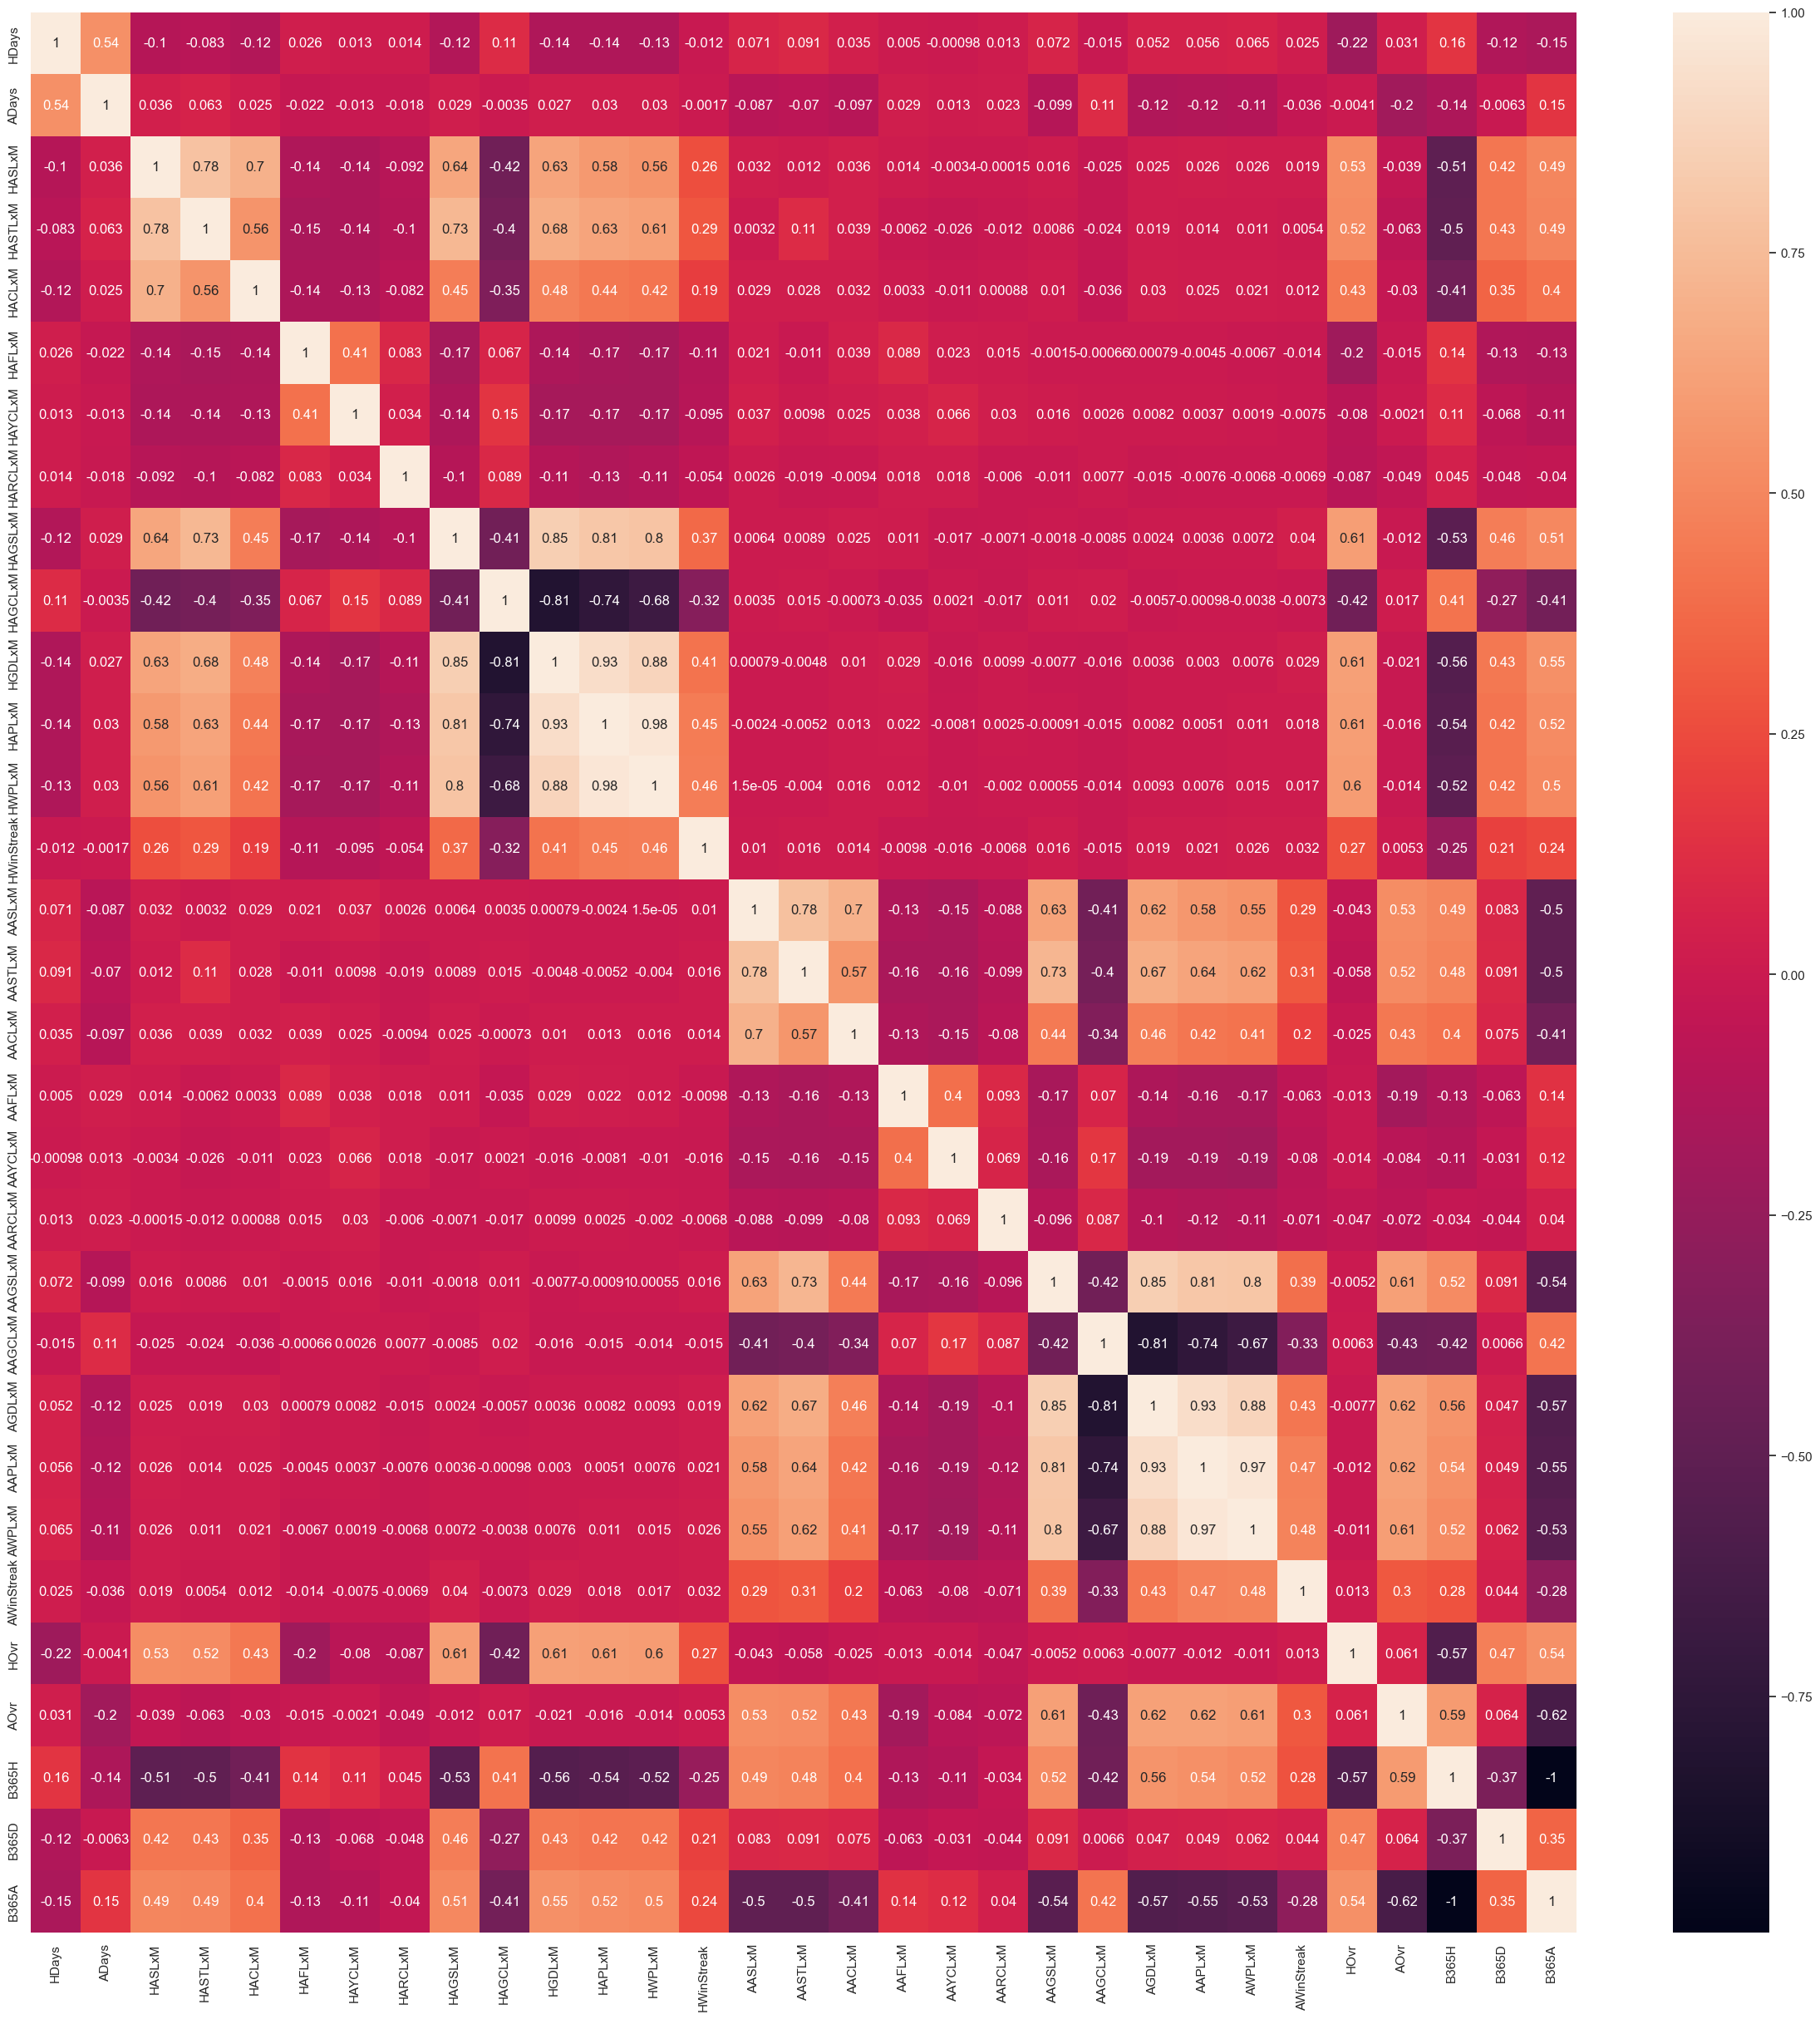

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [14]:
# Take one of HASLxM, HASTLxM, HACLxM
# Take one of HAGSLxM, HGDLxM, HAPLxM, HWPLxM
# Take one of AASLxM, AASTLxM, AACLxM
# Take one of AAGSLxM, AGDLxM, AAPLxM, AWPLxM

df = df.drop([
              'HASTLxM', 'HACLxM',
              'HAGSLxM', 'HGDLxM', 'HAPLxM',
              'AASTLxM', 'AACLxM',
              'AAGSLxM', 'AGDLxM', 'AAPLxM'
             ], axis=1)

In [15]:
df.shape

(3324, 22)

C:\Users\choibs\AppData\Local\Temp\ipykernel_6704\3633589625.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'), annot=True)


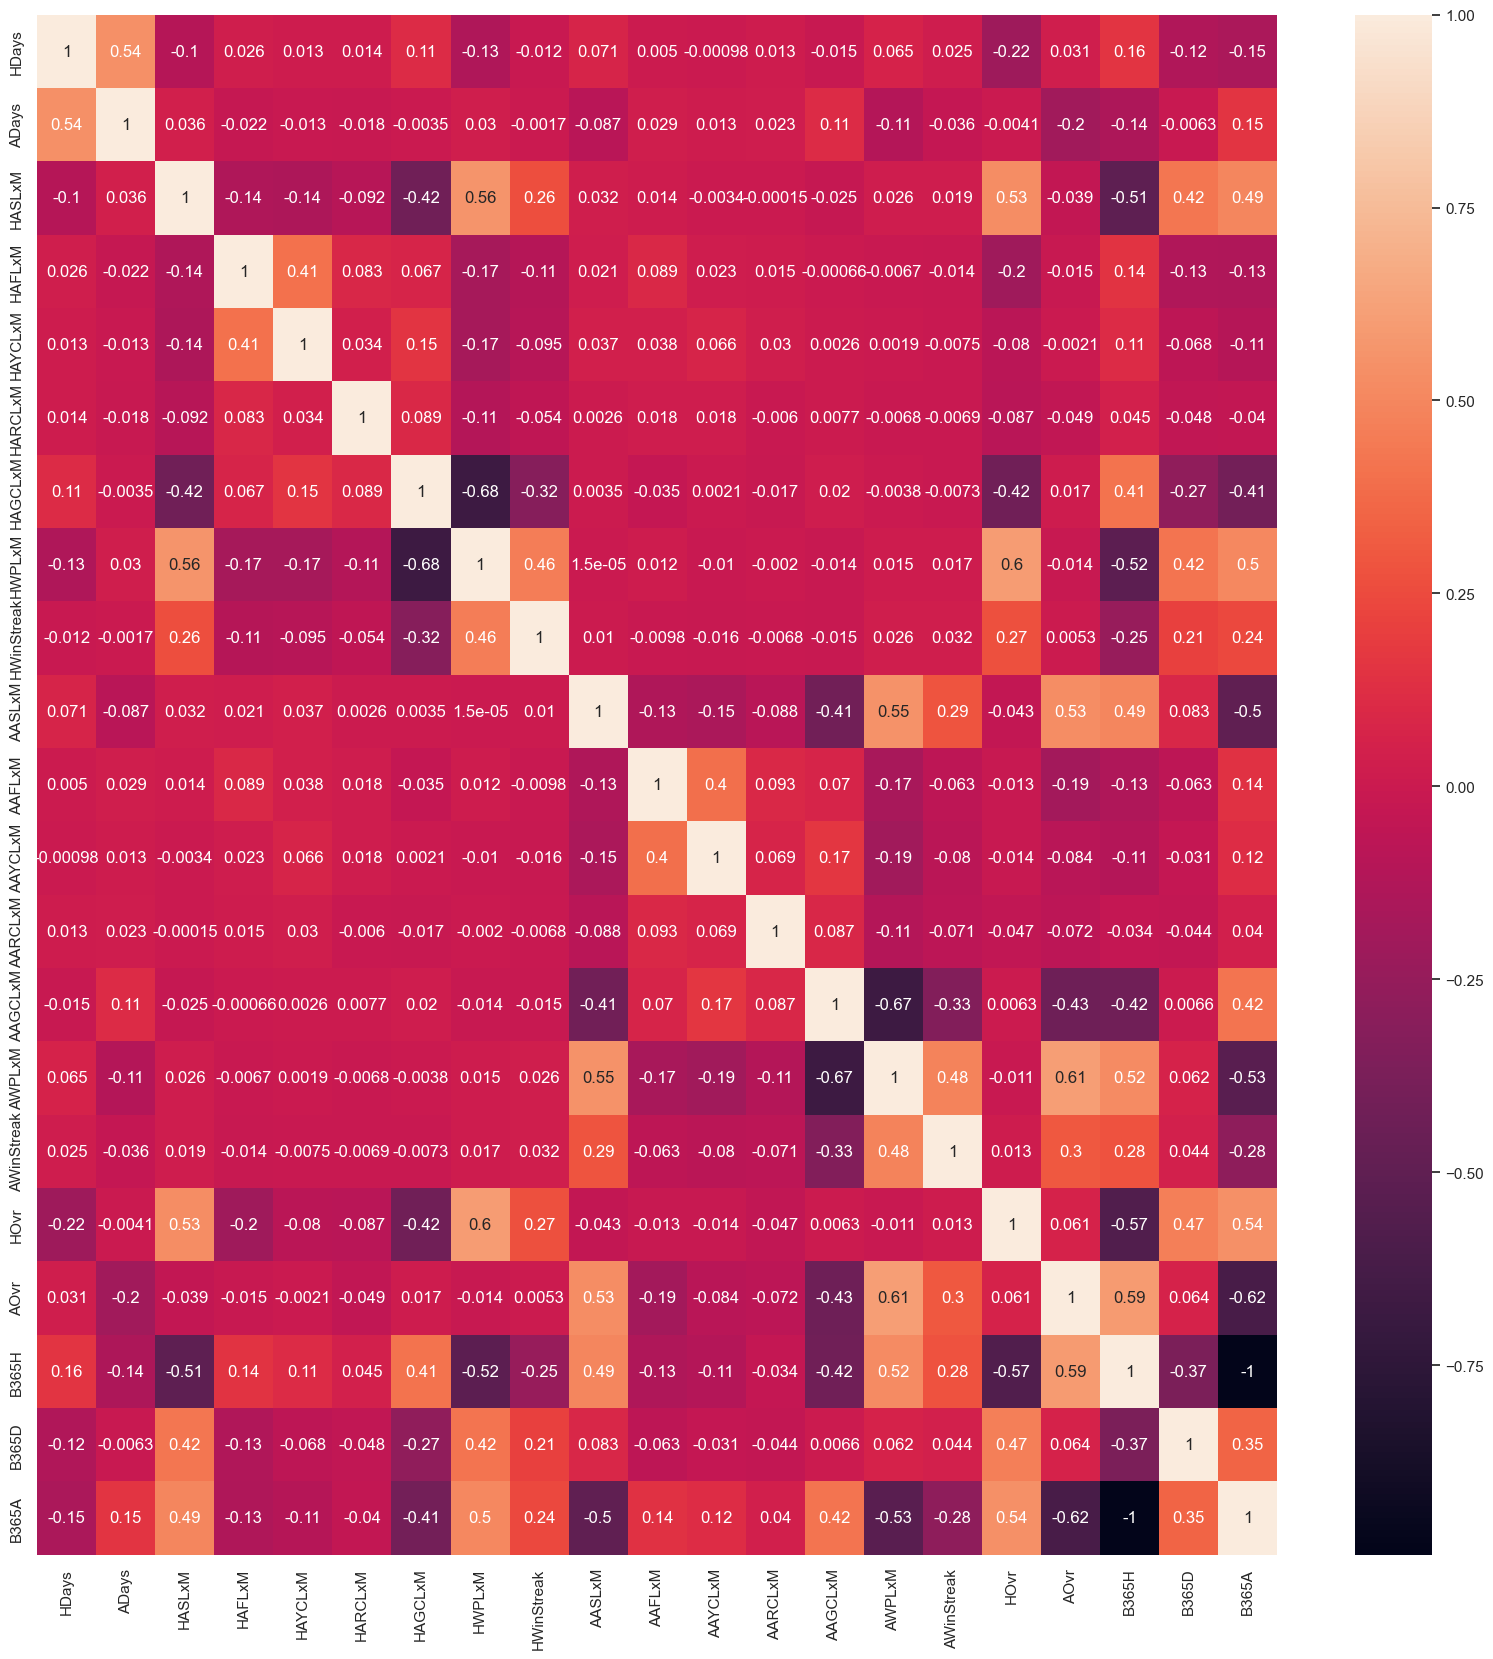

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [17]:
df.head()

,HDays,ADays,HASLxM,HAFLxM,HAYCLxM,HARCLxM,HAGCLxM,HWPLxM,HWinStreak,AASLxM,AAFLxM,AAYCLxM,AARCLxM,AAGCLxM,AWPLxM,AWinStreak,HOvr,AOvr,B365H,B365D,B365A,Result
0,3,4,18.2,9.6,1.3,0.0,1.1,50.0,1.0,13.4,11.8,1.6,0.0,1.5,40.0,0.0,79.33,75.33,1.40,4.5,8.5,W
1,7,7,11.7,11.4,1.5,0.1,1.9,20.0,0.0,12.7,10.8,1.2,0.0,1.3,40.0,1.0,72.00,75.33,2.15,3.4,3.8,L
2,3,4,6.2,10.8,1.5,0.0,1.8,30.0,0.0,11.2,10.9,1.2,0.0,1.3,50.0,0.0,71.00,75.33,2.50,3.4,3.0,W
3,10,10,12.4,11.0,1.5,0.1,1.4,30.0,1.0,10.4,11.1,1.5,0.0,1.3,40.0,0.0,73.33,75.33,2.05,3.5,4.0,W
4,7,7,10.4,9.7,1.5,0.0,1.3,20.0,1.0,10.3,10.4,1.4,0.0,1.4,30.0,0.0,75.67,75.33,2.25,3.4,3.5,W


In [18]:
df.shape

(3324, 22)

## 3.2 BoxPlot Analysis

Next, we plot boxplots between all the features and the target variable (Result) to verify the relationship between all variables and the Result. The idea here is to identify and eliminate variables that do not contribute to the prediction of the Result variable.

In [22]:
df.columns

Index(['HDays', 'ADays', 'HASLxM', 'HAFLxM', 'HAYCLxM', 'HARCLxM', 'HAGCLxM',
       'HWPLxM', 'HWinStreak', 'AASLxM', 'AAFLxM', 'AAYCLxM', 'AARCLxM',
       'AAGCLxM', 'AWPLxM', 'AWinStreak', 'HOvr', 'AOvr', 'B365H', 'B365D',
       'B365A', 'Result'],
      dtype='object')

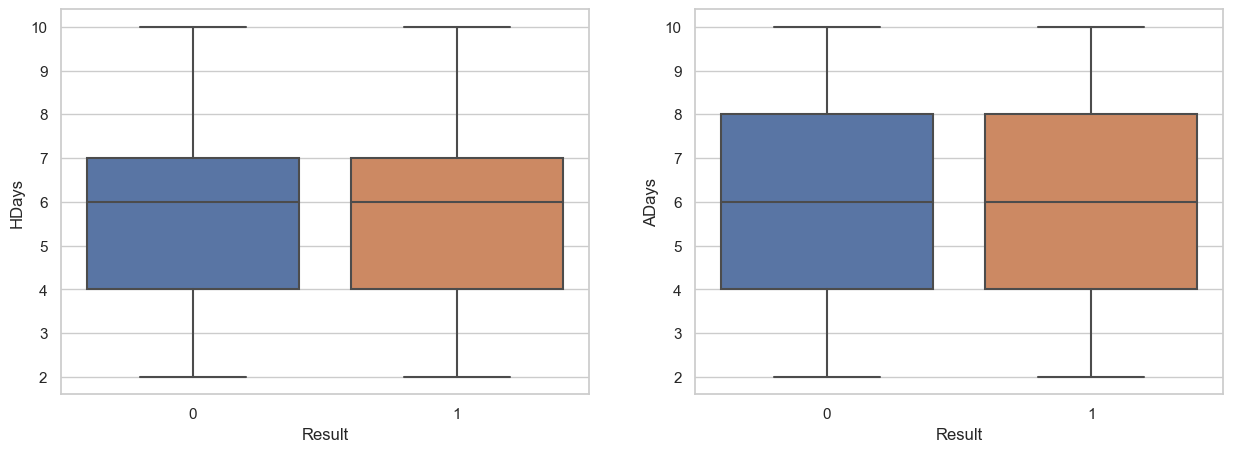

<Figure size 640x480 with 0 Axes>

In [23]:
# HDays and ADays
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Result"], y=df['HDays'])

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Result"], y=df['ADays'])

plt.show()
plt.tight_layout()

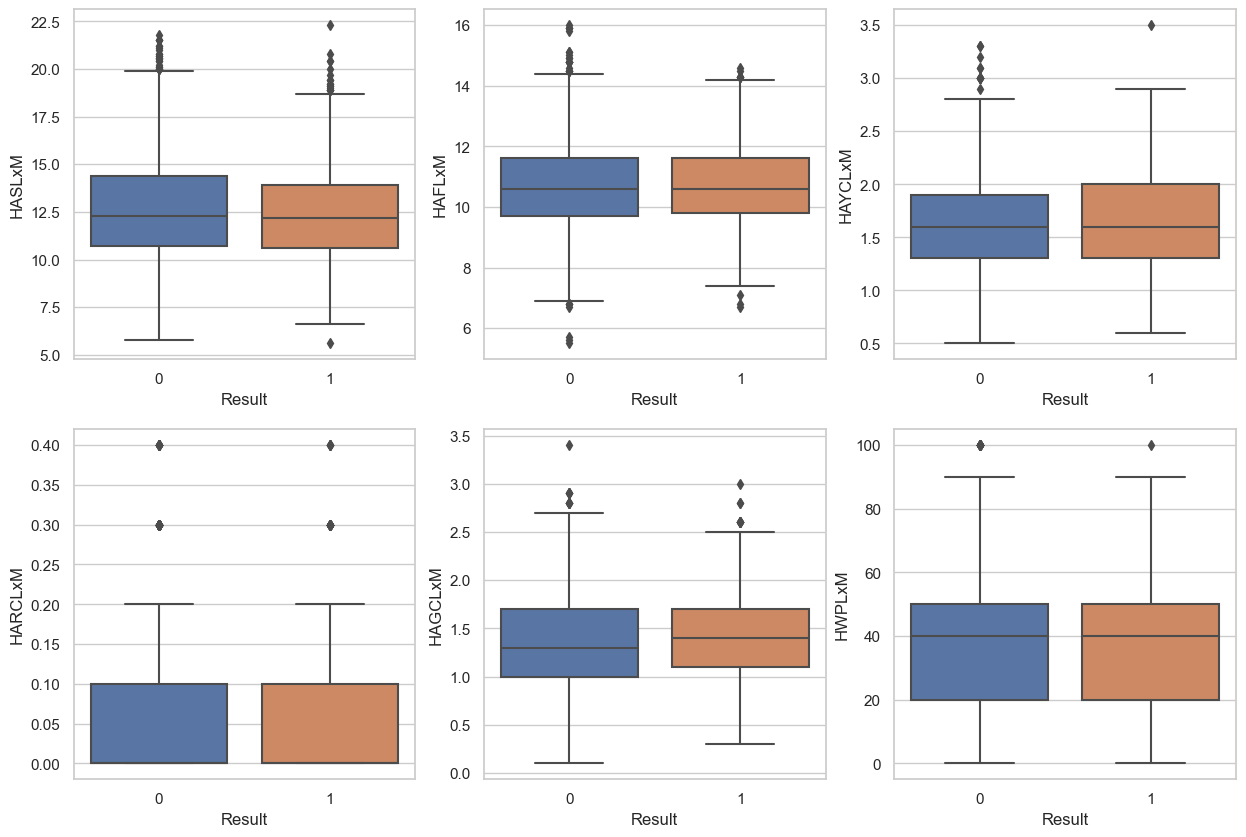

<Figure size 640x480 with 0 Axes>

In [24]:
# Home Form Features
# 'HASLxM', 'HAFLxM', 'HAYCLxM', 'HARCLxM', 'HAGCLxM', 'HWPLxM'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x=df["Result"], y=df['HASLxM'])

plt.subplot(2, 3, 2)
sns.boxplot(x=df["Result"], y=df['HAFLxM'])

plt.subplot(2, 3, 3)
sns.boxplot(x=df["Result"], y=df['HAYCLxM'])

plt.subplot(2, 3, 4)
sns.boxplot(x=df["Result"], y=df['HARCLxM'])

plt.subplot(2, 3, 5)
sns.boxplot(x=df["Result"], y=df['HAGCLxM'])

plt.subplot(2, 3, 6)
sns.boxplot(x=df["Result"], y=df['HWPLxM'])

plt.show()
plt.tight_layout()

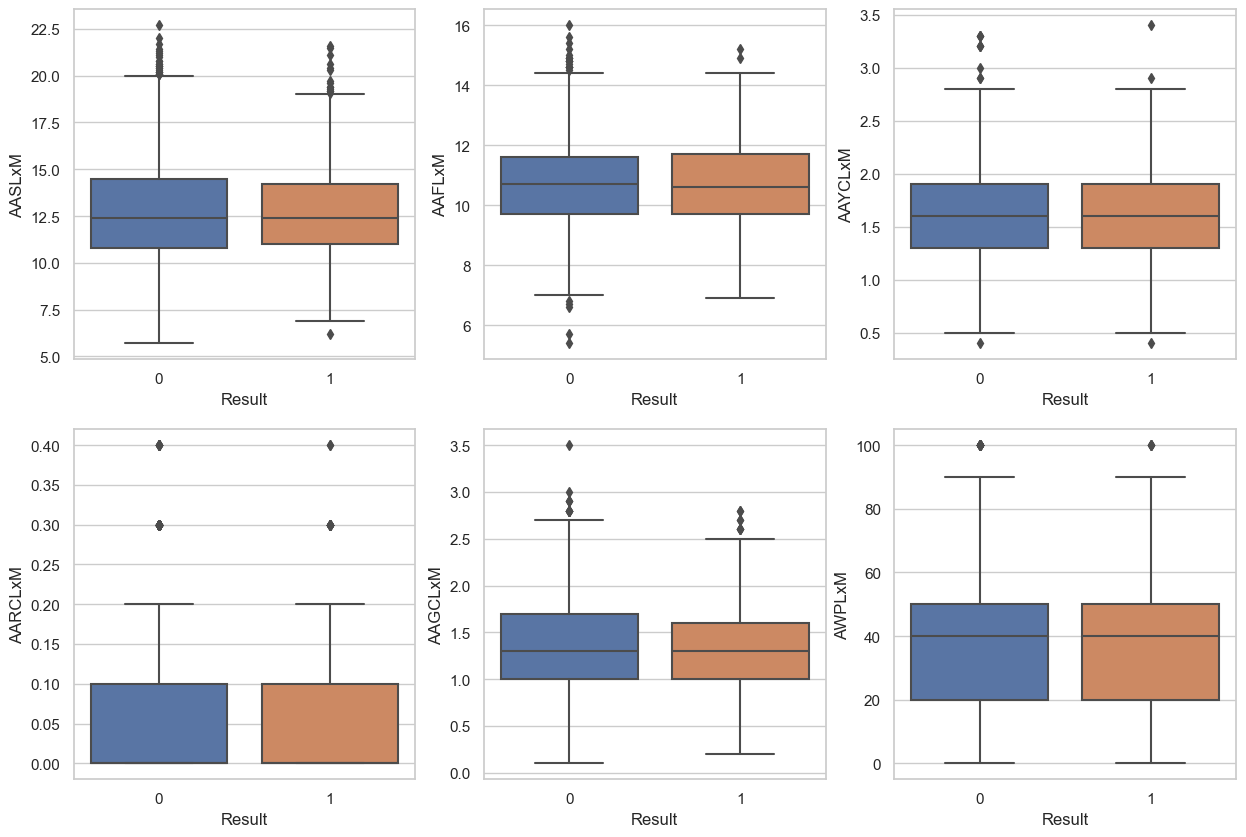

<Figure size 640x480 with 0 Axes>

In [25]:
# Away Form Features
# 'AASLxM', 'AAFLxM', 'AAYCLxM', 'AARCLxM', 'AAGCLxM', 'AWPLxM'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x=df["Result"], y=df['AASLxM'])

plt.subplot(2, 3, 2)
sns.boxplot(x=df["Result"], y=df['AAFLxM'])

plt.subplot(2, 3, 3)
sns.boxplot(x=df["Result"], y=df['AAYCLxM'])

plt.subplot(2, 3, 4)
sns.boxplot(x=df["Result"], y=df['AARCLxM'])

plt.subplot(2, 3, 5)
sns.boxplot(x=df["Result"], y=df['AAGCLxM'])

plt.subplot(2, 3, 6)
sns.boxplot(x=df["Result"], y=df['AWPLxM'])

plt.show()
plt.tight_layout()

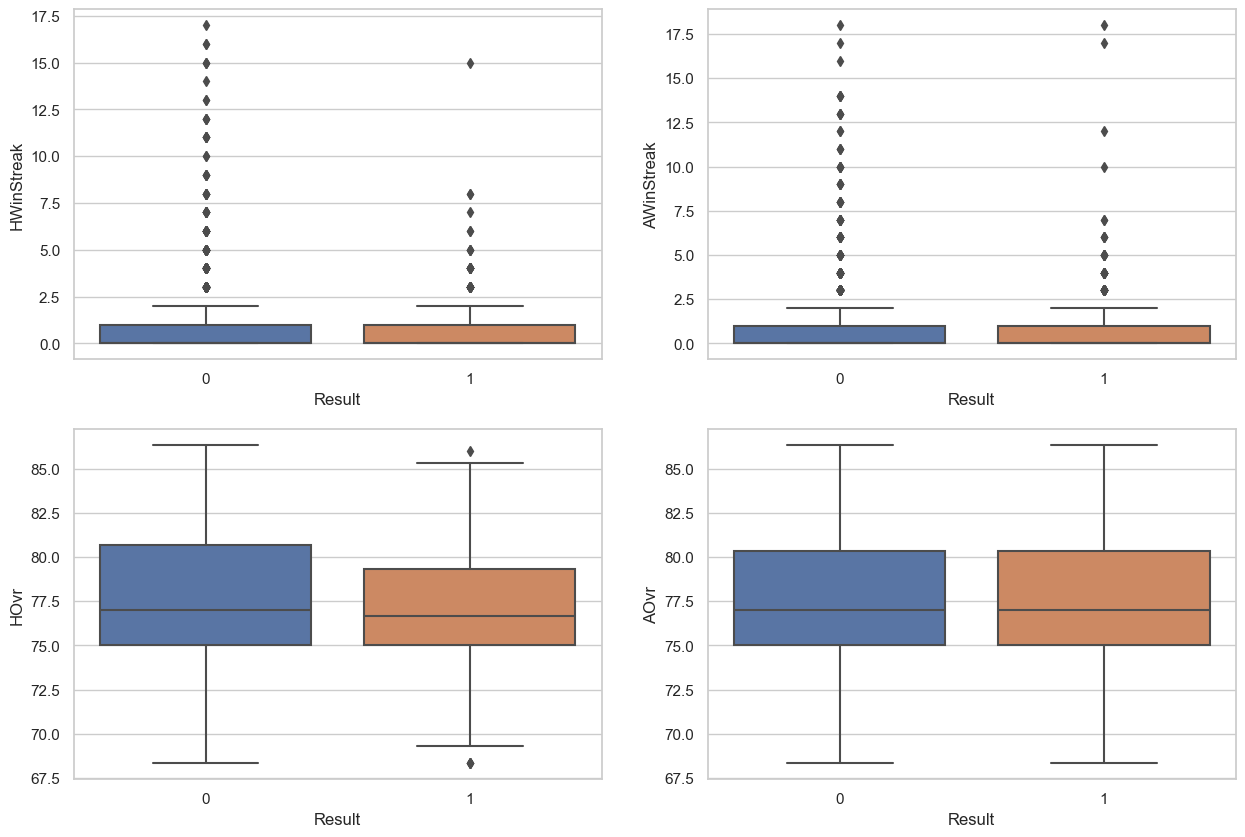

<Figure size 640x480 with 0 Axes>

In [26]:
# 'HWinStreak' and 'AWinStreak'
# 'HOvr', 'AOvr'

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df["Result"], y=df['HWinStreak'])

plt.subplot(2, 2, 2)
sns.boxplot(x=df["Result"], y=df['AWinStreak'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df["Result"], y=df['HOvr'])

plt.subplot(2, 2, 4)
sns.boxplot(x=df["Result"], y=df['AOvr'])

plt.show()
plt.tight_layout()

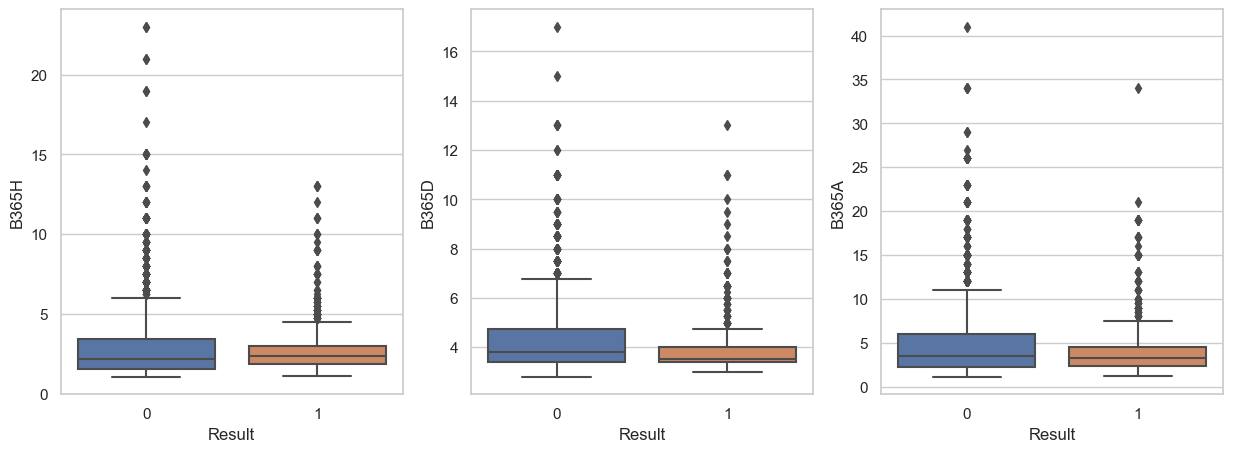

<Figure size 640x480 with 0 Axes>

In [27]:
# 'B365H', 'B365D', 'B365A'

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df["Result"], y=df['B365H'])

plt.subplot(1, 3, 2)
sns.boxplot(x=df["Result"], y=df['B365D'])

plt.subplot(1, 3, 3)
sns.boxplot(x=df["Result"], y=df['B365A'])

plt.show()
plt.tight_layout()

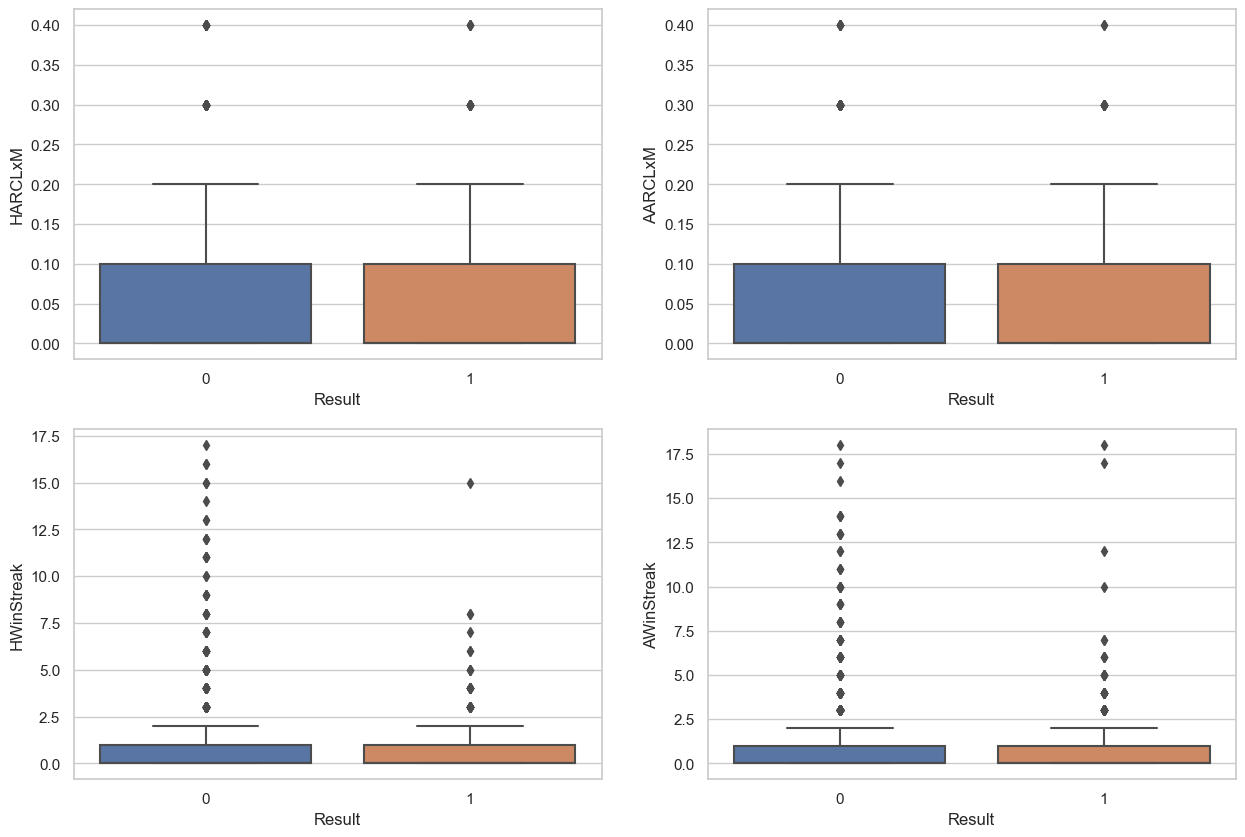

<Figure size 640x480 with 0 Axes>

In [28]:
# 'HWinStreak' and 'AWinStreak'
# 'HOvr', 'AOvr'

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df["Result"], y=df['HARCLxM'])

plt.subplot(2, 2, 2)
sns.boxplot(x=df["Result"], y=df['AARCLxM'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df["Result"], y=df['HWinStreak'])

plt.subplot(2, 2, 4)
sns.boxplot(x=df["Result"], y=df['AWinStreak'])

plt.show()
plt.tight_layout()

We will eliminate features with obvious overlapping boxplots. The eliminated features are: 'HARCLxM', 'AARCLxM', 'HWinStreak' and 'AWinStreak'

In [29]:
df = df.drop(['HARCLxM', 'AARCLxM', 'HWinStreak', 'AWinStreak'], axis=1)

In [30]:
df.head()

,HDays,ADays,HASLxM,HAFLxM,HAYCLxM,HAGCLxM,HWPLxM,AASLxM,AAFLxM,AAYCLxM,AAGCLxM,AWPLxM,HOvr,AOvr,B365H,B365D,B365A,Result
0,3,4,18.2,9.6,1.3,1.1,50.0,13.4,11.8,1.6,1.5,40.0,79.33,75.33,1.40,4.5,8.5,0
1,7,7,11.7,11.4,1.5,1.9,20.0,12.7,10.8,1.2,1.3,40.0,72.00,75.33,2.15,3.4,3.8,0
2,3,4,6.2,10.8,1.5,1.8,30.0,11.2,10.9,1.2,1.3,50.0,71.00,75.33,2.50,3.4,3.0,0
3,10,10,12.4,11.0,1.5,1.4,30.0,10.4,11.1,1.5,1.3,40.0,73.33,75.33,2.05,3.5,4.0,0
4,7,7,10.4,9.7,1.5,1.3,20.0,10.3,10.4,1.4,1.4,30.0,75.67,75.33,2.25,3.4,3.5,0


In [31]:
df.shape

(3324, 18)

## 3.3 BORUTA Feature Selection

In [19]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [20]:
y = df.Result
X = df.drop("Result", 1)
colnames = X.columns

# using the BorutaPy function
rf = RandomForestClassifier(n_jobs = -1, class_weight="balanced_subsample", max_depth=5)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector.fit(X.values, y.values.ravel())

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

boruta_score

C:\Users\choibs\AppData\Local\Temp\ipykernel_6704\592268983.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Result", 1)


,Features,Score
20,B365A,1.00
13,AAGCLxM,1.00
2,HASLxM,1.00
19,B365D,1.00
18,B365H,1.00
17,AOvr,1.00
7,HWPLxM,1.00
16,HOvr,1.00
9,AASLxM,1.00
14,AWPLxM,1.00


In [21]:
# drop features with less than 0.5
df = df.drop(['HDays', 'ADays', 'HWinStreak', 'AWinStreak', 'AARCLxM', 'HARCLxM'], axis=1)

In [22]:
df.head()

,HASLxM,HAFLxM,HAYCLxM,HAGCLxM,HWPLxM,AASLxM,AAFLxM,AAYCLxM,AAGCLxM,AWPLxM,HOvr,AOvr,B365H,B365D,B365A,Result
0,18.2,9.6,1.3,1.1,50.0,13.4,11.8,1.6,1.5,40.0,79.33,75.33,1.40,4.5,8.5,W
1,11.7,11.4,1.5,1.9,20.0,12.7,10.8,1.2,1.3,40.0,72.00,75.33,2.15,3.4,3.8,L
2,6.2,10.8,1.5,1.8,30.0,11.2,10.9,1.2,1.3,50.0,71.00,75.33,2.50,3.4,3.0,W
3,12.4,11.0,1.5,1.4,30.0,10.4,11.1,1.5,1.3,40.0,73.33,75.33,2.05,3.5,4.0,W
4,10.4,9.7,1.5,1.3,20.0,10.3,10.4,1.4,1.4,30.0,75.67,75.33,2.25,3.4,3.5,W


In [23]:
df.shape

(3324, 16)

# 4. Training and Test Set

## 4.1 Splitting to Train and Test Set

In [9]:
# shuffle dataframe rows
df = df.sample(frac = 1)

df.head()

,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAGCLxM,HAGSLxHM,HAGCLxHM,HGDLxM,HGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,AASLxM,AASTLxM,AACLxM,AAFLxM,AAYCLxM,AARCLxM,AAGSLxM,AAGCLxM,AAGSLxAM,AAGCLxAM,AGDLxM,AGDLxAM,AAPLxM,AAPLxAM,AWPLxM,AWPLxAM,AWinStreak,HDef,HMid,HAtt,HOvr,ADef,AMid,AAtt,AOvr,B365H,B365D,B365A,Result
2138,5,5,13.3,4.9,5.4,11.4,1.4,0.3,1.8,1.0,2.6,1.3,8.0,13.0,1.9,2.2,60.0,0.7,2.0,14.8,5.4,6.6,11.5,1.4,0.0,2.3,0.4,1.1,0.8,19.0,3.0,2.3,1.3,70.0,30.0,1.0,82,84,85,83.67,81,83,87,83.67,2.50,3.2,3.20,W
1843,10,7,10.2,2.9,3.8,9.9,1.5,0.0,1.2,1.2,1.4,1.1,0.0,3.0,1.6,1.8,40.0,0.5,1.0,9.1,2.5,4.0,12.4,2.1,0.1,0.8,2.2,0.4,1.9,-14.0,-15.0,0.2,0.3,0.0,10.0,0.0,73,74,76,74.33,73,73,74,73.33,2.25,3.3,3.60,L
110,7,3,9.7,3.5,4.1,10.7,1.7,0.1,1.3,1.5,1.1,1.8,-2.0,-7.0,1.1,1.1,20.0,0.3,0.0,14.0,5.8,5.3,12.6,1.5,0.0,2.1,0.6,1.1,1.4,15.0,-3.0,2.0,1.3,60.0,40.0,2.0,71,71,72,71.33,73,76,76,75.00,3.80,3.6,2.05,L
3084,6,7,16.3,5.8,6.2,12.2,1.9,0.0,2.0,1.1,1.5,1.5,9.0,0.0,1.9,1.6,60.0,0.4,0.0,10.7,3.6,4.4,10.0,1.3,0.1,1.0,1.4,0.8,0.7,-4.0,1.0,0.9,1.5,30.0,50.0,0.0,83,85,84,84.00,78,80,79,79.00,1.33,5.0,9.50,D
3127,8,5,9.4,2.5,3.8,7.7,1.7,0.1,0.2,2.8,0.3,1.9,-26.0,-16.0,0.2,0.4,0.0,0.1,0.0,14.3,4.4,5.0,10.5,2.1,0.1,1.1,1.7,1.3,1.4,-6.0,-1.0,1.0,1.4,20.0,40.0,0.0,74,74,74,74.00,75,77,78,76.67,3.40,3.5,2.10,L


In [10]:
df.shape

(3324, 48)

In [13]:
train_df = pd.DataFrame(columns=list(df.columns))
train_df.head()

,HDays,ADays,HASLxM,HASTLxM,HACLxM,HAFLxM,HAYCLxM,HARCLxM,HAGSLxM,HAGCLxM,HAGSLxHM,HAGCLxHM,HGDLxM,HGDLxHM,HAPLxM,HAPLxHM,HWPLxM,HWPLxHM,HWinStreak,AASLxM,AASTLxM,AACLxM,AAFLxM,AAYCLxM,AARCLxM,AAGSLxM,AAGCLxM,AAGSLxAM,AAGCLxAM,AGDLxM,AGDLxAM,AAPLxM,AAPLxAM,AWPLxM,AWPLxAM,AWinStreak,HDef,HMid,HAtt,HOvr,ADef,AMid,AAtt,AOvr,B365H,B365D,B365A,Result


In [14]:
class_W_count = 0
class_D_count = 0
class_L_count = 0

i = 0
while True:
    if (df.iloc[i, -1] == 'W') and (class_W_count < 550):
        train_df.loc[len(train_df.index)] = df.iloc[i, :].values
        df = df.drop(df.index[i])
        class_W_count += 1
        
    elif (df.iloc[i, -1] == 'D') and (class_D_count < 550):
        train_df.loc[len(train_df.index)] = df.iloc[i, :].values
        df = df.drop(df.index[i])
        class_D_count += 1
        
    elif (df.iloc[i, -1] == 'L') and (class_L_count < 550):
        train_df.loc[len(train_df.index)] = df.iloc[i, :].values
        df = df.drop(df.index[i])
        class_L_count += 1
        
    else:
        i += 1
    
    if (class_W_count == 550) and (class_D_count == 550) and (class_L_count == 550):
        break

In [15]:
train_df.Result.value_counts()

W    550
L    550
D    550
Name: Result, dtype: int64

In [16]:
df.Result.value_counts()

W    940
L    509
D    225
Name: Result, dtype: int64

In [17]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = df.iloc[:, :-1]
y_test = df.iloc[:, -1]

In [18]:
y_test.shape

(1674,)

In [29]:
X_train.dtypes

HDays         float64
ADays         float64
HASLxM        float64
HASTLxM       float64
HACLxM        float64
HAFLxM        float64
HAYCLxM       float64
HARCLxM       float64
HAGSLxM       float64
HAGCLxM       float64
HAGSLxHM      float64
HAGCLxHM      float64
HGDLxM        float64
HGDLxHM       float64
HAPLxM        float64
HAPLxHM       float64
HWPLxM        float64
HWPLxHM       float64
HWinStreak    float64
AASLxM        float64
AASTLxM       float64
AACLxM        float64
AAFLxM        float64
AAYCLxM       float64
AARCLxM       float64
AAGSLxM       float64
AAGCLxM       float64
AAGSLxAM      float64
AAGCLxAM      float64
AGDLxM        float64
AGDLxAM       float64
AAPLxM        float64
AAPLxAM       float64
AWPLxM        float64
AWPLxAM       float64
AWinStreak    float64
HDef          float64
HMid          float64
HAtt          float64
HOvr          float64
ADef          float64
AMid          float64
AAtt          float64
AOvr          float64
B365H         float64
B365D     

In [27]:
cols = list(X_test.columns)

X_test[cols] = X_test[cols].astype(float)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.decomposition import PCA

In [ ]:
# df.head()

In [ ]:
# df = df.sample(frac = 1)

In [ ]:
# df.head()

In [30]:
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

# # split to train set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

# # numerical value standardization
# sc = StandardScaler()
# X_train.iloc[:, :] = sc.fit_transform(X_train.iloc[:, :])
# X_test.iloc[:, :] = sc.transform(X_test.iloc[:, :])

In [29]:
# X_train.head()

,HASLxM,HAFLxM,HAYCLxM,HAGCLxM,HWPLxM,AASLxM,AAFLxM,AAYCLxM,HOvr,AOvr,B365H,B365D,B365A
2068,-1.882611,-0.070884,-0.309686,-0.341404,0.079893,0.482610,-0.437206,1.292622,-0.442693,1.433226,1.614316,-0.024338,-0.770589
3264,0.650833,-1.753110,-0.080375,-0.552961,1.065669,-0.619437,-0.577186,-0.748131,1.713547,1.253616,-0.410782,-0.382836,-0.272741
1789,-0.578632,-1.963388,-0.309686,-0.552961,0.572781,-0.068413,0.402672,1.746123,0.276952,0.092855,-0.319766,-0.669635,-0.375507
307,-0.168810,0.349673,-0.768307,-1.610748,0.079893,0.188731,-1.417065,-0.067880,-0.531638,1.253616,0.385605,-0.526235,-0.649553
1394,-0.690402,-1.052182,1.983420,-0.129846,-1.398772,0.188731,-0.857146,-0.521381,-0.442693,0.449394,0.294589,-0.454536,-0.672390


In [31]:
# X_train.shape

(2659, 13)

In [40]:
# X_test.head()

,HASLxM,HAFLxM,HAYCLxM,HAGCLxM,HWPLxM,AASLxM,AAFLxM,AAYCLxM,HOvr,AOvr,B365H,B365D,B365A
3088,-1.584559,-0.911997,-0.768307,-0.764519,-0.905884,-1.317400,-0.157247,0.839121,-0.262108,-0.890977,0.067050,-0.813034,-0.558204
591,-0.802171,-0.982090,0.836867,0.927940,0.079893,0.666284,-0.507196,0.385621,-0.262108,0.985542,0.931698,-0.167738,-0.734050
3182,-0.504119,-0.351255,-0.538996,0.293268,-0.412996,1.952005,-0.927135,1.972873,-1.520813,0.629003,0.704159,-0.311137,-0.706645
1209,0.352781,0.770230,-0.997618,-0.552961,0.572781,0.849959,-1.417065,-1.881883,0.816012,1.969374,1.386777,-0.024338,-0.779724
1449,0.390038,2.943105,0.836867,-0.764519,-0.412996,1.254043,-0.087257,-0.521381,-0.981753,0.004391,0.249081,-0.454536,-0.638134


In [41]:
# X_test.shape

(665, 13)

In [42]:
# y_test.shape

(665,)

In [32]:
# y_train.shape

(2659,)

In [33]:
# y_train.value_counts()

0    2039
1     620
Name: Result, dtype: int64

In [ ]:
# x_train

In [38]:
# y_test.value_counts()

0    510
1    155
Name: Result, dtype: int64

## 4.2 Data Imbalance

In [97]:
# from imblearn.over_sampling import SMOTE

# print(y_train.value_counts())
# print()

# # SMOTE
# smt = SMOTE(sampling_strategy="auto", random_state=0, k_neighbors=5)

# # Fit the smote model with training data only
# X_train, y_train = smt.fit_resample(X_train, y_train)

# print(y_train.value_counts())
# print()

## 4.3 Dimensionality Reduction Techniques

In [98]:
# # LDA
# lda = LDA(n_components = 2)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

# # PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [99]:
# X_train[0]

In [100]:
# X_test[0]

# 5. Model Building

Accuracy on Test Set (Random Forest): 
- 0.544360902255639
- {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}

Accuracy on Test Set (Logistic Regression): 
- 0.5428571428571428
- {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy on Test Set (Support Vector): 
- 0.5338345864661654
- {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Accuracy on Test Set (XGBoost): 
- 0.5503759398496241
- {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 60}

Accuracy on Test Set (Stack Classifier): 
- 0.5203938115330521

## 5.1 Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(random_state = 0)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'criterion' :['entropy']    
}
# rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
rf_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = rf_classifier.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


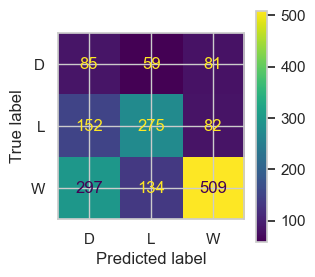

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['D', 'L', 'W'])
cmp.plot(ax=ax)

plt.show()

In [ ]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = rf_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [32]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC
y_pred_proba = rf_classifier.predict_proba(X_test)
print('ROC on Test Set:', roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.519115890083632
ROC on Test Set: 0.7254162646727649

              precision    recall  f1-score   support

           D       0.16      0.38      0.22       225
           L       0.59      0.54      0.56       509
           W       0.76      0.54      0.63       940

    accuracy                           0.52      1674
   macro avg       0.50      0.49      0.47      1674
weighted avg       0.63      0.52      0.56      1674



### Save Model

In [52]:
# get the best parameters
print(rf_classifier.best_params_)

# save model
pickle.dump(rf_classifier, open("models/rf_classifier.pkl", "wb"))

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 300}


## 5.2 Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression(random_state = 0)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
lr_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
lr_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = lr_classifier.predict(X_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\choibs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


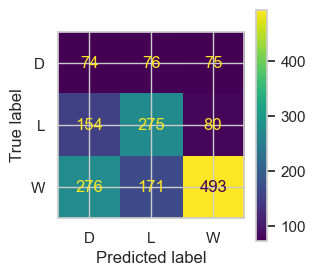

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['D', 'L', 'W'])
cmp.plot(ax=ax)

plt.show();

In [57]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = lr_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [35]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC
y_pred_proba = lr_classifier.predict_proba(X_test)
print('ROC on Test Set:', roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5029868578255675
ROC on Test Set: 0.7195790895566607

              precision    recall  f1-score   support

           D       0.15      0.33      0.20       225
           L       0.53      0.54      0.53       509
           W       0.76      0.52      0.62       940

    accuracy                           0.50      1674
   macro avg       0.48      0.46      0.45      1674
weighted avg       0.61      0.50      0.54      1674



### Save Model

In [51]:
# get the best parameters
print(lr_classifier.best_params_)

# save model
pickle.dump(lr_classifier, open("models/lr_classifier.pkl", "wb"))

{'C': 0.0018329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}


## 5.3 SVM Classifier

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


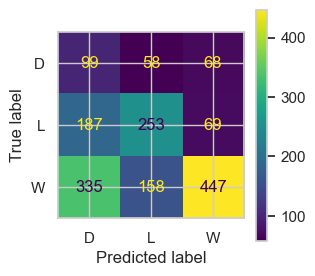

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['D', 'L', 'W'])
cmp.plot(ax=ax)

plt.show();

In [54]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = svc_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [38]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC
y_pred_proba = svc_classifier.predict_proba(X_test)
print('ROC on Test Set:', roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.477299880525687
ROC on Test Set: 0.7160503967683459

              precision    recall  f1-score   support

           D       0.16      0.44      0.23       225
           L       0.54      0.50      0.52       509
           W       0.77      0.48      0.59       940

    accuracy                           0.48      1674
   macro avg       0.49      0.47      0.45      1674
weighted avg       0.62      0.48      0.52      1674



### Save Model

In [46]:
# get the best parameters
print(svc_classifier.best_params_)

# save model
pickle.dump(svc_classifier, open("models/svc_classifier.pkl", "wb"))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


## 5.4 XGBoost Classifier

Highest Accuracy: 51.8 %

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# for xgboost, have to encode test data
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# XGB Classifier
# use GridSearchCV for hyperparameter tuning
classifier = XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
xgb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
xgb_classifier.fit(X_train, y_train)

# predict
y_pred = xgb_classifier.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


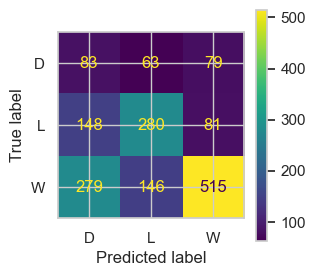

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['D', 'L', 'W'])
cmp.plot(ax=ax)

plt.show();

In [44]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = xgb_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [41]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC
y_pred_proba = xgb_classifier.predict_proba(X_test)
print('ROC on Test Set:', roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5244922341696535
ROC on Test Set: 0.7229941899213538

              precision    recall  f1-score   support

           0       0.16      0.37      0.23       225
           1       0.57      0.55      0.56       509
           2       0.76      0.55      0.64       940

    accuracy                           0.52      1674
   macro avg       0.50      0.49      0.47      1674
weighted avg       0.62      0.52      0.56      1674



### Save Model

In [ ]:
# get the best parameters
print(xgb_classifier.best_params_)

# save model
pickle.dump(xgb_classifier, open("models/xgb_classifier.pkl", "wb"))

# 6. Evaluate Model

In [101]:
import pickle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# load models
rf_classifier = pickle.load(open("models/rf_classifier.pkl", "rb"))
lr_classifier = pickle.load(open("models/lr_classifier.pkl", "rb"))
svc_classifier = pickle.load(open("models/svc_classifier.pkl", "rb"))
xgb_classifier = pickle.load(open("models/xgb_classifier.pkl", "rb"))

In [102]:
# get accuracies of each model
y_pred = rf_classifier.predict(X_test)
print('Accuracy on Test Set (Random Forest):', accuracy_score(y_test, y_pred))
print()

y_pred = lr_classifier.predict(X_test)
print('Accuracy on Test Set (Logistic Regression):', accuracy_score(y_test, y_pred))
print()

y_pred = svc_classifier.predict(X_test)
print('Accuracy on Test Set (Support Vector):', accuracy_score(y_test, y_pred))
print()

##################
# for xgboost, have to encode test data
##################
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_pred = xgb_classifier.predict(X_test)
print('Accuracy on Test Set (XGBoost):', accuracy_score(y_test, y_pred))
print()

Accuracy on Test Set (Random Forest): 0.5578947368421052

Accuracy on Test Set (Logistic Regression): 0.5458646616541354

Accuracy on Test Set (Support Vector): 0.5413533834586466

Accuracy on Test Set (XGBoost): 0.5593984962406015

